# GT 신뢰도 평가 분석

## 1) 환경 설정 및 라이브러리 로드

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 차트 한글 폰트 이슈
plt.rcParams["font.family"] = (
    "AppleGothic"
    if "AppleGothic" in plt.rcParams.get("font.family", [])
    else plt.rcParams.get("font.family")
)

DATA_PATH = Path(
    "/Users/haing/Desktop/🏫2025-1/졸업 프로젝트 /Carrer-Hi/Career-HY-Service/experiment/data/GT Analysis v2.0 Aug 3 2025.numbers_평가.csv"
)
assert DATA_PATH.exists(), f"파일이 존재하지 않습니다: {DATA_PATH}"
pd.set_option("display.max_colwidth", 200)

## 2) 데이터 로드 및 컬럼 확인

In [29]:
df = pd.read_csv(DATA_PATH, encoding="utf-8-sig")
print("컬럼:", list(df.columns))
df.head()

컬럼: ['GT_ID', '학생_전공', '학생_관심분야', '수강과목', '완전한_검색_쿼리', '학생_질문', '공고_제목', '회사명', '거리점수', 'URL', '관련도 1-5 ', '이유 / 특징 ']


,GT_ID,학생_전공,학생_관심분야,수강과목,완전한_검색_쿼리,학생_질문,공고_제목,회사명,거리점수,URL,관련도 1-5,이유 / 특징
0,190,컴퓨터공학,"소프트웨어 개발, 임베디드 시스템, 머신 비전","임베디드시스템, 임베디드시스템설계, CSE융합세미나1, 객체지향시스템설계, 계산이론및오토마타, 데이터사이언스, 네트워크프로토콜, 기계학습알고리즘, 공학도를위한창의적프로그래밍, 소프트웨어공학, 웹프로그래밍, AI+X:인공지능, 금융인공지능실무, 비즈니스인텔리전스와인공지능의실재, 인공지능과머신러닝","질문: 나는 C++로 프로젝트를 몇 번 해봤고 임베디드 시스템 개발자가 되고 싶어. 나에게 맞는 채용 공고를 추천해줄래?\n전공: 컴퓨터공학\n관심 직무: 소프트웨어 개발, 임베디드 시스템, 머신 비전\n자격증: 정보처리기사, C++ 프로그래밍 자격증\n동아리/대외활동: 프로그래밍 동아리 활동, 머신러닝 프로젝트 진행, 임베디드 시스템 관련 해커톤 ...",나는 C++로 프로젝트를 몇 번 해봤고 임베디드 시스템 개발자가 되고 싶어. 나에게 맞는 채용 공고를 추천해줄래?,[분당/코스닥] SW 개발(임베디드/응용소프트웨어),회사명 없음,0.000,https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=public-recruit&rec_idx=50324621,5.0,임베디드 개발자 (질문)\n자격요건 : C++\n우대: 방산 개발 경험
1,190,컴퓨터공학,"소프트웨어 개발, 임베디드 시스템, 머신 비전","임베디드시스템, 임베디드시스템설계, CSE융합세미나1, 객체지향시스템설계, 계산이론및오토마타, 데이터사이언스, 네트워크프로토콜, 기계학습알고리즘, 공학도를위한창의적프로그래밍, 소프트웨어공학, 웹프로그래밍, AI+X:인공지능, 금융인공지능실무, 비즈니스인텔리전스와인공지능의실재, 인공지능과머신러닝","질문: 나는 C++로 프로젝트를 몇 번 해봤고 임베디드 시스템 개발자가 되고 싶어. 나에게 맞는 채용 공고를 추천해줄래?\n전공: 컴퓨터공학\n관심 직무: 소프트웨어 개발, 임베디드 시스템, 머신 비전\n자격증: 정보처리기사, C++ 프로그래밍 자격증\n동아리/대외활동: 프로그래밍 동아리 활동, 머신러닝 프로젝트 진행, 임베디드 시스템 관련 해커톤 ...",나는 C++로 프로젝트를 몇 번 해봤고 임베디드 시스템 개발자가 되고 싶어. 나에게 맞는 채용 공고를 추천해줄래?,기술연구소 하드웨어/펌웨어 엔지니어 모집,회사명 없음,0.127,https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=public-recruit&rec_idx=50429439,4.0,"임베디드 시스템 (IoT) 보다는 하드웨어 엔지니어 (펌웨어, 회로, 자장비 제어)에 더 가까움. \n\n전자공학 관련 전공 우대. \n"
2,190,컴퓨터공학,"소프트웨어 개발, 임베디드 시스템, 머신 비전","임베디드시스템, 임베디드시스템설계, CSE융합세미나1, 객체지향시스템설계, 계산이론및오토마타, 데이터사이언스, 네트워크프로토콜, 기계학습알고리즘, 공학도를위한창의적프로그래밍, 소프트웨어공학, 웹프로그래밍, AI+X:인공지능, 금융인공지능실무, 비즈니스인텔리전스와인공지능의실재, 인공지능과머신러닝","질문: 나는 C++로 프로젝트를 몇 번 해봤고 임베디드 시스템 개발자가 되고 싶어. 나에게 맞는 채용 공고를 추천해줄래?\n전공: 컴퓨터공학\n관심 직무: 소프트웨어 개발, 임베디드 시스템, 머신 비전\n자격증: 정보처리기사, C++ 프로그래밍 자격증\n동아리/대외활동: 프로그래밍 동아리 활동, 머신러닝 프로젝트 진행, 임베디드 시스템 관련 해커톤 ...",나는 C++로 프로젝트를 몇 번 해봤고 임베디드 시스템 개발자가 되고 싶어. 나에게 맞는 채용 공고를 추천해줄래?,농심엔지니어링(주) 검사장비 S/W개발(머신비전/초분광),회사명 없음,0.156,https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=public-recruit&rec_idx=50273583,5.0,머신비전 수업을 들음-> 매우 밀접
3,190,컴퓨터공학,"소프트웨어 개발, 임베디드 시스템, 머신 비전","임베디드시스템, 임베디드시스템설계, CSE융합세미나1, 객체지향시스템설계, 계산이론및오토마타, 데이터사이언스, 네트워크프로토콜, 기계학습알고리즘, 공학도를위한창의적프로그래밍, 소프트웨어공학, 웹프로그래밍, AI+X:인공지능, 금융인공지능실무, 비즈니스인텔리전스와인공지능의실재, 인공지능과머신러닝","질문: 나는 C++로 프로젝트를 몇 번 해봤고 임베디드 시스템 개발자가 되고 싶어. 나에게 맞는 채용 공고를 추천해줄래?\n전공: 컴퓨터공학\n관심 직무: 소프트웨어 개발, 임베디드 시스템, 머신 비전\n자격증: 정보처리기사, C++ 프로그래밍 자격증\n동아리/대외활동: 프로그래밍 동아리 활동, 머신러닝 프로젝트 진행, 임베디드 시스템 관련 해커톤 ...",나는 C++로 프로젝트를 몇 번 해봤고 임베디드 시스템 개발자가 되고 싶어. 나에게 맞는 채용 공고를 추천해줄래?,IT 인프라 시스템 기술영업,회사명 없음,0.150,https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=public-recruit&rec_idx=50416124,0.0,확인할 수 없음
4,191,컴퓨터공학,"소프트웨어 개발자, 백엔드 개발자, 클러스터 개발자","객체지향프로그래밍-JAVA, C프로그래밍, 웹프로그래밍, 바이오메디컬프로그래밍, 컴퓨터공학, 게임프로그래밍을위한캡스톤디자인, 공학도를위한창의적프로그래밍, 소프트웨어공학, 기계학습알고리즘, 자료구조와알고리즘, 네트워크및재고전략, 네트워크프로토콜, 무선네트워크, 컴퓨터네트워크, 컴퓨터소프트웨어캡스톤PBL(알고리즘테스트실습)","질문: 나는 java로 프로젝트를 몇 번 해봤고 서버 개발자가 되고 싶어. 나에게 맞는 채용 공고를 추천해줄래?\n전공: 컴퓨터공학\n관심 직무: 소프트웨어 개발자, 백엔드 개발자, 클러스터 개발자\n자격증: 정보처리기사, AWS Certified Developer\n동아리/대외활동: 프로그래밍 동아리 활동, 알고리즘 스터디 운영, 해커톤 참가\n수...",나는 java로 프로젝트를 몇 번 해봤고 서버 개발자가 되고 싶어. 나에게 맞는 채용 공고를 추천해줄래?,PG 개발팀 개발자 팀원 모집,회사명 없음,0.000,https://www.saramin.co.kr/zf_user/jobs/relay/view?view_type=public-recruit&rec_idx=50373990,3.0,"개발 관련 학과와 전공은 맞으나, 임베디드 개발자 x -> 채용공고 자체가 부족할 수 있으므로 AI가관련해서 관련도 설명 필요"


## 3) 점수 컬럼 전처리
- `관련도 0, 1-5` 컬럼의 null은 제외하고, 1~5 사이의 유효 점수만 사용

In [30]:
# 12명에 대한 관련도

# 점수 컬럼 식별 (이름에 '관련도'와 0,'1-5'가 포함된 첫 컬럼 사용)
# 11개의 학생 프로필 사용
score_col = [c for c in df.columns if "관련도" in c and "1-5" in c][0]
df_not_null = df[df[score_col].notna()].copy()
# print(df_not_null)
print(len(df_not_null))

# scores = pd.to_numeric(df[score_col], errors="coerce")
# scores_non_null = scores.dropna()
in_range = df_not_null[(df_not_null[score_col] >= 0) & (df_not_null[score_col] <= 5)]
print("유효 점수 개수:", len(in_range), " / 원본 행 수:", len(df))

59
유효 점수 개수: 59  / 원본 행 수: 664


## 4) 정확도(≥4 비율) & 분포(1~5)

In [32]:
scores = pd.to_numeric(df[score_col], errors="coerce")
in_range = scores.dropna()
in_range = in_range[(in_range >= 0) & (in_range <= 5)]

accuracy = (in_range >= 4).mean() if len(in_range) else np.nan
dist = (
    in_range.round()
    .value_counts()
    .reindex([0, 1, 2, 3, 4, 5], fill_value=0)
    .astype(int)
)
print(
    f"정확도(≥4): {accuracy:.4f} ({accuracy*100:.2f}%)"
    if not np.isnan(accuracy)
    else "정확도(≥4): NA"
)
dist_df = dist.rename_axis("score").reset_index(name="count")
dist_df

정확도(≥4): 0.5593 (55.93%)


,score,count
0,0,2
1,1,8
2,2,8
3,3,8
4,4,21
5,5,12


## 5) 분포 차트

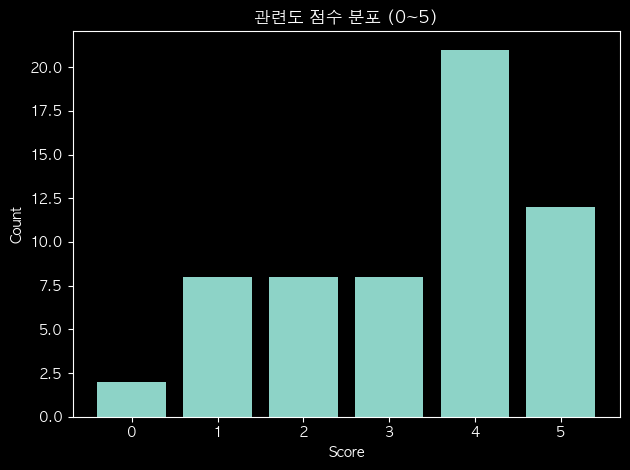

In [ ]:
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정
if platform.system() == "Darwin":  # MacOS
    plt.rcParams["font.family"] = "AppleGothic"
elif platform.system() == "Windows":
    plt.rcParams["font.family"] = "Malgun Gothic"
else:  # Linux (Colab, Ubuntu 등)
    plt.rcParams["font.family"] = "NanumGothic"

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

plt.figure()
plt.bar(dist.index.astype(str), dist.values)
plt.title("관련도 점수 분포 (0~5)")
plt.xlabel("Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## 6) 사용자(또는 GT_ID)별 정확도
- 각 사람당 5개 프로필 중 `관련도`가 null인 행은 제외하고 계산

In [ ]:
df = pd.read_csv(DATA_PATH, encoding="utf-8-sig")

# 점수 컬럼 식별
score_col = [c for c in df.columns if "관련도" in c and "1-5" in c][0]
group_col = "GT_ID" if "GT_ID" in df.columns else None


group_col = "GT_ID" if "GT_ID" in df.columns else None
if group_col is None:
    print("GT_ID 컬럼이 없어 그룹 기준 정확도를 계산하지 않습니다.")
else:
    tmp = df.copy()
    tmp["score"] = pd.to_numeric(tmp[score_col], errors="coerce")
    tmp = tmp[(tmp["score"] >= 0) & (tmp["score"] <= 5)]
    per_user = (
        tmp.groupby(group_col)["score"]
        .apply(lambda s: (s >= 4).mean())
        .reset_index(name="accuracy_ge4")
    )
    per_user.head(20)